In [3]:
library(wtss)

In [7]:
server<- WTSS("http://www.esensing.dpi.inpe.br/wtss")

In [8]:
coverages<- listCoverages(server)
coverages

[1] "MOD13Q1"

In [9]:
cv_name<- "MOD13Q1"
cv_scheme<- describeCoverage(server,cv_name)
dput(cv_scheme)

list(MOD13Q1 = list(name = "MOD13Q1", description = "Vegetation Indices 16-Day L3 Global 250m", 
    detail = "https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mod13q1", 
    dimensions = list(x = list(name = "col_id", min_idx = 1L, 
        max_idx = 9600L), y = list(name = "row_id", min_idx = 1L, 
        max_idx = 14400L), t = list(name = "time_id", min_idx = 1L, 
        max_idx = 412L)), spatial_extent = list(xmin = -69.2820322946525, 
        xmax = -39.9999999994056, ymin = -29.9999999973059, ymax = 0), 
    spatial_resolution = list(x = 0.00208699421859422, y = 0.00208699421859234), 
    crs = list(proj4 = "+proj=longlat +datum=WGS84 +no_defs ", 
        wkt = "GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4326\"]]"), 
    timelin

In [14]:
cv_scheme[[cv_name]]$attributes$name


[1] "mir"  "blue" "nir"  "red"  "evi"  "ndvi"

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=BRAZIL&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=BRAZIL&sensor=false


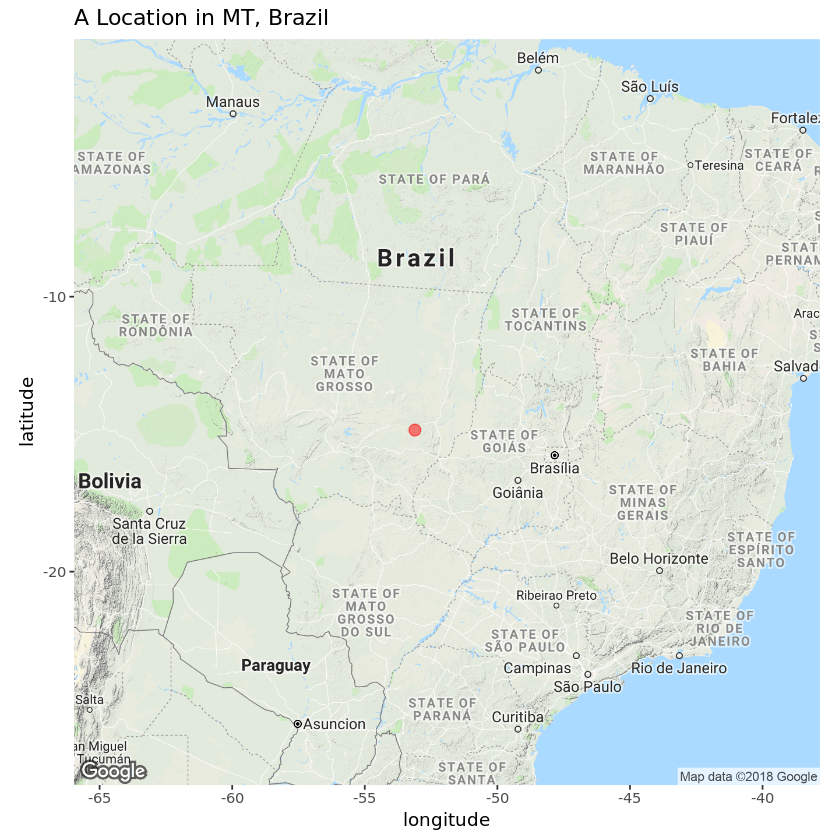

In [23]:
library(ggmap)
longitude <- -53.11
latitude  <- -14.91
points <- data.frame(lon=longitude,lat=latitude)
map<- get_map(location="BRAZIL", zoom=5)

ggmap(map)+
 geom_point(data=points,color="red",size=3,alpha=0.5) +
 labs(x = "longitude", y ="latitude",title="A Location in MT, Brazil")

In [19]:
attributes <- cv_scheme[[cv_name]]$attributes$name
start<- "2002-09-01"
end<-"2014-08-31"
ts<- timeSeries(object = server,
               coverages = cv_name,
               attributes = attributes,
               latitude = latitude,
               longitude = longitude,
               start = start,
               end= end)

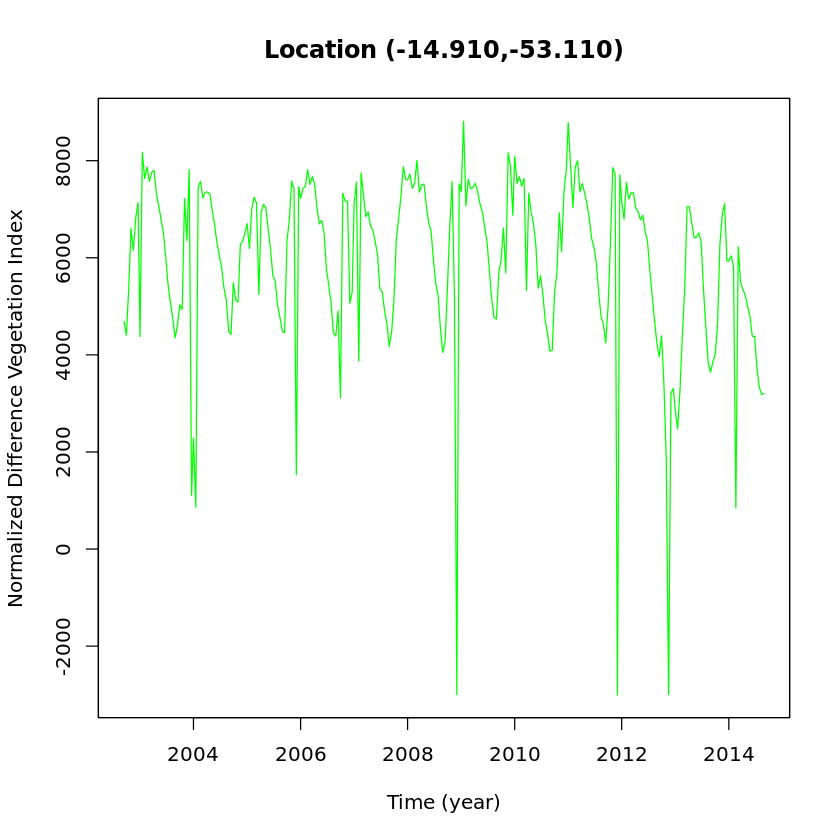

In [29]:
plot(ts[[1]]$attributes$ndvi,
    main= sprintf("Location (%5.3f,%5.3f)",
            latitude,longitude),
     xlab="Time (year)",
     ylab="Normalized Difference Vegetation Index", 
     col="green", col.lab="black")